In [9]:
import os
import librosa
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
AUDIO_DIR = "./SoundAnimals_Train/train"

In [3]:
def calcular_duraciones(audio_dir):
    duraciones = []
    
    for archivo in os.listdir(audio_dir):
        if archivo.endswith(".wav"):
            ruta_audio = os.path.join(audio_dir, archivo)
            try:
                # Carga el audio con librosa
                y, sr = librosa.load(ruta_audio, sr=None)
                duracion = librosa.get_duration(y=y, sr=sr)
                duraciones.append(duracion)
            except Exception as e:
                print(f"Error al procesar {archivo}: {e}")
    
    return duraciones



def generar_boxplot(duraciones):
    plt.figure(figsize=(10, 6))
    plt.boxplot(duraciones, vert=False, patch_artist=True, showmeans=True)
    plt.title("Duraciones de los audios")
    plt.xlabel("Duración (segundos)")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

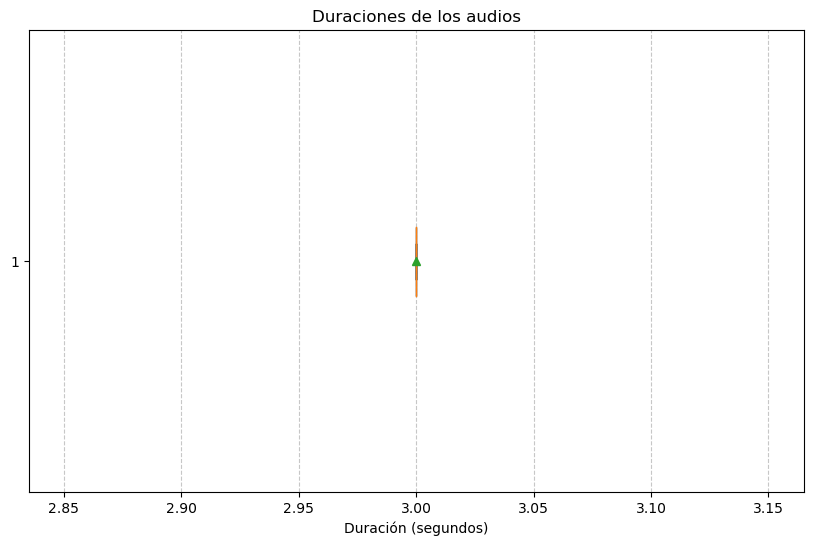

Duración mínima: 3.00 segundos
Duración máxima: 3.00 segundos
Duración promedio: 3.00 segundos


In [8]:
duraciones = calcular_duraciones(AUDIO_DIR)

# Generar el boxplot
generar_boxplot(duraciones)

# Imprimir estadísticas básicas
print(f"Duración mínima: {min(duraciones):.2f} segundos")
print(f"Duración máxima: {max(duraciones):.2f} segundos")
print(f"Duración promedio: {sum(duraciones)/len(duraciones):.2f} segundos")

In [10]:
def detectar_desbalanceo(csv_path):
    # Leer el archivo CSV
    data = pd.read_csv(csv_path)
    
    # Calcular el total de muestras por clase (columna)
    clases = data.iloc[:, 1:]  # Ignorar la primera columna (nombre de archivo)
    suma_por_clase = clases.sum()
    
    # Mostrar estadísticas
    print("Distribución de las clases:")
    print(suma_por_clase)
    
    # Generar un gráfico de barras
    plt.figure(figsize=(12, 6))
    suma_por_clase.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Distribución de clases en el dataset")
    plt.ylabel("Número de muestras")
    plt.xlabel("Clases (Animales)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [11]:
CSV_PATH = "./SoundAnimals_Train/train.csv"

Distribución de las clases:
SPHSUR    13258
BOABIS    10888
SCIPER     3791
DENNAH      467
LEPLAT     5244
RHIICT      310
BOALEP      846
BOAFAB     6438
PHYCUV     4240
DENMIN     6070
ELABIC     1214
BOAPRA      480
DENCRU      602
BOALUN     2060
BOAALB     3704
PHYMAR      200
PITAZU     4873
PHYSAU     1479
LEPFUS     1232
DENNAN     3801
PHYALB     5374
LEPLAB     1329
SCIFUS        0
BOARAN     1339
SCIFUV     2734
AMEPIC       68
LEPPOD     6032
ADEDIP      390
ELAMAT      395
PHYNAT      410
LEPELE       34
RHISCI       11
SCINAS        0
LEPNOT     1062
ADEMAR      520
BOAALM     1601
PHYDIS      897
RHIORN       21
LEPFLA        7
SCIRIZ       73
DENELE      149
SCIALT      232
dtype: int64


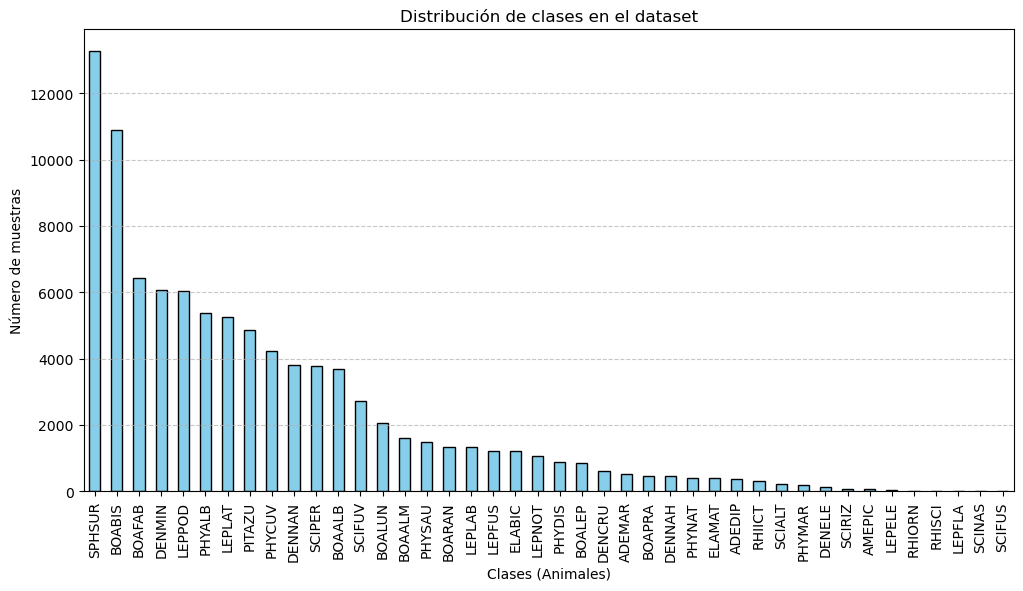

In [12]:
detectar_desbalanceo(CSV_PATH)